# Import database

In [1]:
#Import pandas and the database
import pandas as pd
pd.set_option('display.max_colwidth', 1000)
df = pd.read_csv('../data/fake_job_postings.csv', encoding='utf-8')
df.head(10)

,job_id,title,location,department,salary_range,company_profile,description,requirements,benefits,telecommuting,has_company_logo,has_questions,employment_type,required_experience,required_education,industry,function,fraudulent
0,1,Marketing Intern,"US, NY, New York",Marketing,NaN,"We're Food52, and we've created a groundbreaking and award-winning cooking site. We support, connect, and celebrate home cooks, and give them everything they need in one place.We have a top editorial, business, and engineering team. We're focused on using technology to find new and better ways to connect people around their specific food interests, and to offer them superb, highly curated information about food and cooking. We attract the most talented home cooks and contributors in the country; we also publish well-known professionals like Mario Batali, Gwyneth Paltrow, and Danny Meyer. And we have partnerships with Whole Foods Market and Random House.Food52 has been named the best food website by the James Beard Foundation and IACP, and has been featured in the New York Times, NPR, Pando Daily, TechCrunch, and on the Today Show.We're located in Chelsea, in New York City.","Food52, a fast-growing, James Beard Award-winning online food community and crowd-sourced and curated recipe hub, is currently interviewing full- and part-time unpaid interns to work in a small team of editors, executives, and developers in its New York City headquarters.Reproducing and/or repackaging existing Food52 content for a number of partner sites, such as Huffington Post, Yahoo, Buzzfeed, and more in their various content management systemsResearching blogs and websites for the Provisions by Food52 Affiliate ProgramAssisting in day-to-day affiliate program support, such as screening affiliates and assisting in any affiliate inquiriesSupporting with PR &amp; Events when neededHelping with office administrative work, such as filing, mailing, and preparing for meetingsWorking with developers to document bugs and suggest improvements to the siteSupporting the marketing and executive staff","Experience with content management systems a major plus (any blogging counts!)Familiar with the Food52 editorial voice and aestheticLoves food, appreciates the importance of home cooking and cooking with the seasonsMeticulous editor, perfectionist, obsessive attention to detail, maddened by typos and broken links, delighted by finding and fixing themCheerful under pressureExcellent communication skillsA+ multi-tasker and juggler of responsibilities big and smallInterested in and engaged with social media like Twitter, Facebook, and PinterestLoves problem-solving and collaborating to drive Food52 forwardThinks big picture but pitches in on the nitty gritty of running a small company (dishes, shopping, administrative support)Comfortable with the realities of working for a startup: being on call on evenings and weekends, and working long hours",NaN,0,1,0,Other,Internship,NaN,NaN,Marketing,0
1,2,Customer Service - Cloud Video Production,"NZ, , Auckland",Success,NaN,"90 Seconds, the worlds Cloud Video Production Service.90 Seconds is the worlds Cloud Video Production Service enabling brands and agencies to get high quality online video content shot and produced anywhere in the world. 90 Seconds makes video production fast, affordable, and all managed seamlessly in the cloud from purchase to publish. http://90#URL_fbe6559afac620a3cd2c22281f7b8d0eef56a73e3d9a311e2f1ca13d081dd630#90 Seconds removes the hassle, cost, risk and speed issues of working with regular video production companies by managing every aspect of video projects in a beautiful online experience. With a growing global network of over 2,000 rated video professionals in over 50 countries managed by dedicated production success teams in 5 countries, 90 Seconds provides a 100% success guarantee.90 Seconds has produced almost 4,000 videos in over 30 Countries for over 500 Global brands including some of the worlds largest including Payp

# Check basic data characteristics

In [2]:
#Check basic data characteristics
print('Shape:', df.shape)
print(df['fraudulent'].value_counts()) #label
print(df['fraudulent'].value_counts(normalize=True)) 


Shape: (17880, 18)
fraudulent
0    17014
1      866
Name: count, dtype: int64
fraudulent
0    0.951566
1    0.048434
Name: proportion, dtype: float64


In [3]:
#Check the missing rate
interest = ['description','company_profile','requirements','title',
            'employment_type','required_experience','telecommuting','fraudulent']
print(df[interest].isna().mean())

description            0.000056
company_profile        0.185011
requirements           0.150783
title                  0.000000
employment_type        0.194128
required_experience    0.394295
telecommuting          0.000000
fraudulent             0.000000
dtype: float64


In [4]:
#Calculate the character length of each description (add a new column)
df['desc_len'] = df['description'].fillna('').str.len()
#Check if company_profile is missing(1=missing, 0=not missing) and add a new column
df['company_profile_missing'] = df['company_profile'].isna().astype(int)

In [5]:
df

,job_id,title,location,department,salary_range,company_profile,description,requirements,benefits,telecommuting,has_company_logo,has_questions,employment_type,required_experience,required_education,industry,function,fraudulent,desc_len,company_profile_missing
0,1,Marketing Intern,"US, NY, New York",Marketing,NaN,"We're Food52, and we've created a groundbreaking and award-winning cooking site. We support, connect, and celebrate home cooks, and give them everything they need in one place.We have a top editorial, business, and engineering team. We're focused on using technology to find new and better ways to connect people around their specific food interests, and to offer them superb, highly curated information about food and cooking. We attract the most talented home cooks and contributors in the country; we also publish well-known professionals like Mario Batali, Gwyneth Paltrow, and Danny Meyer. And we have partnerships with Whole Foods Market and Random House.Food52 has been named the best food website by the James Beard Foundation and IACP, and has been featured in the New York Times, NPR, Pando Daily, TechCrunch, and on the Today Show.We're located in Chelsea, in New York City.","Food52, a fast-growing, James Beard Award-winning online food community and crowd-sourced and curated recipe hub, is currently interviewing full- and part-time unpaid interns to work in a small team of editors, executives, and developers in its New York City headquarters.Reproducing and/or repackaging existing Food52 content for a number of partner sites, such as Huffington Post, Yahoo, Buzzfeed, and more in their various content management systemsResearching blogs and websites for the Provisions by Food52 Affiliate ProgramAssisting in day-to-day affiliate program support, such as screening affiliates and assisting in any affiliate inquiriesSupporting with PR &amp; Events when neededHelping with office administrative work, such as filing, mailing, and preparing for meetingsWorking with developers to document bugs and suggest improvements to the siteSupporting the marketing and executive staff","Experience with content management systems a major plus (any blogging counts!)Familiar with the Food52 editorial voice and aestheticLoves food, appreciates the importance of home cooking and cooking with the seasonsMeticulous editor, perfectionist, obsessive attention to detail, maddened by typos and broken links, delighted by finding and fixing themCheerful under pressureExcellent communication skillsA+ multi-tasker and juggler of responsibilities big and smallInterested in and engaged with social media like Twitter, Facebook, and PinterestLoves problem-solving and collaborating to drive Food52 forwardThinks big picture but pitches in on the nitty gritty of running a small company (dishes, shopping, administrative support)Comfortable with the realities of working for a startup: being on call on evenings and weekends, and working long hours",NaN,0,1,0,Other,Internship,NaN,NaN,Marketing,0,905,0
1,2,Customer Service - Cloud Video Production,"NZ, , Auckland",Success,NaN,"90 Seconds, the worlds Cloud Video Production Service.90 Seconds is the worlds Cloud Video Production Service enabling brands and agencies to get high quality online video content shot and produced anywhere in the world. 90 Seconds makes video production fast, affordable, and all managed seamlessly in the cloud from purchase to publish. http://90#URL_fbe6559afac620a3cd2c22281f7b8d0eef56a73e3d9a311e2f1ca13d081dd630#90 Seconds removes the hassle, cost, risk and speed issues of working with regular video production companies by managing every aspect of video projects in a beautiful online experience. With a growing global network of over 2,000 rated video professionals in over 50 countries managed by dedicated production success teams in 5 countries, 90 Seconds provides a 100% success guarantee.90 Seconds has produced almost 4,000 videos in over 30 Countries for over 500 Global brands including so

In [6]:
print(pd.crosstab(df['telecommuting'], df['fraudulent'], normalize='index'))

fraudulent            0         1
telecommuting                    
0              0.953135  0.046865
1              0.916558  0.083442


# Data clean

In [7]:
# Data clean

# Fill NA
text_cols = ['description', 'company_profile', 'requirements']
df[text_cols] = df[text_cols].fillna('')

cat_cols = ['employment_type', 'required_experience']
df[cat_cols] = df[cat_cols].fillna('Unknown')

# Check telecommuting unique values
print('telecommuting unique values:', df['telecommuting'].unique())

# Check and remove duplicate rows
before = df.shape[0]
df = df.drop_duplicates()
after = df.shape[0]
print(f'Removed {before - after} duplicate rows')

# Remove leading and trailing spaces from text
for col in text_cols:
    df[col] = df[col].str.strip()

# Check missing rate after data clean
print('Missing rate after cleaning:')
print(df.isna().mean())

telecommuting unique values: [0 1]
Removed 0 duplicate rows
Missing rate after cleaning:
job_id                     0.000000
title                      0.000000
location                   0.019351
department                 0.645805
salary_range               0.839597
company_profile            0.000000
description                0.000000
requirements               0.000000
benefits                   0.403356
telecommuting              0.000000
has_company_logo           0.000000
has_questions              0.000000
employment_type            0.000000
required_experience        0.000000
required_education         0.453300
industry                   0.274217
function                   0.361018
fraudulent                 0.000000
desc_len                   0.000000
company_profile_missing    0.000000
dtype: float64


# Comparison between categorical variables and fraudulent

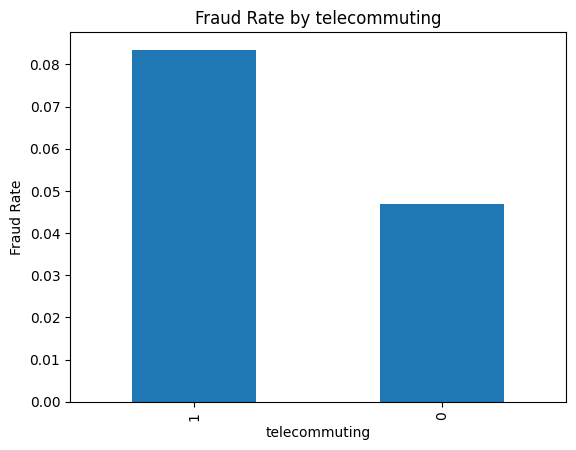

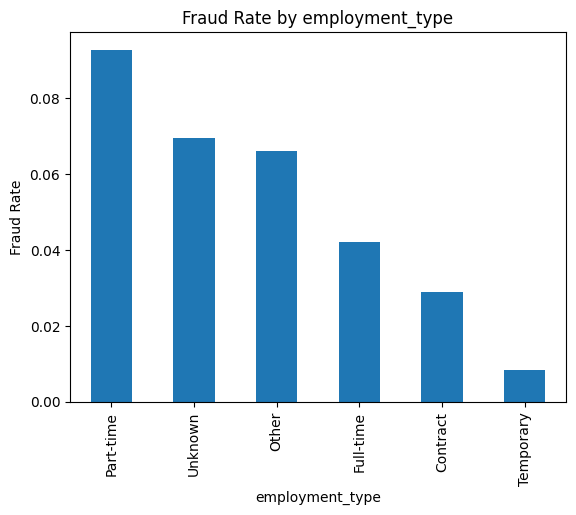

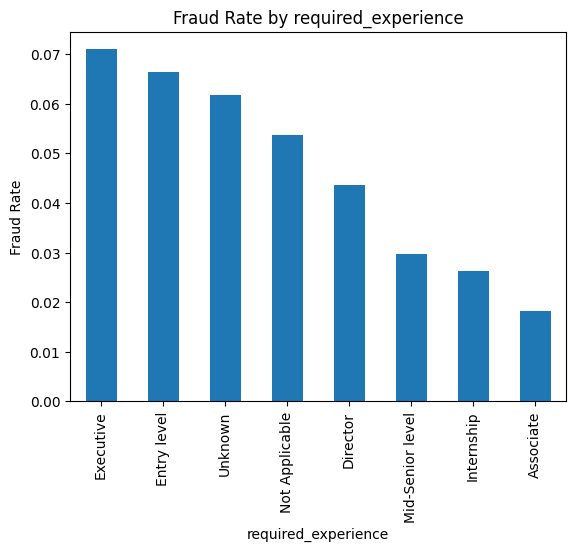

In [8]:
#import the things I need
import matplotlib.pyplot as plt
import seaborn as sns

# make a def to draw plot
def plot_fraud_rate_by_category(df, col):
    fraud_rate = pd.crosstab(df[col], df['fraudulent'], normalize='index')[1]
    fraud_rate.sort_values(ascending=False).plot(kind='bar')
    plt.title(f'Fraud Rate by {col}')
    plt.ylabel('Fraud Rate')
    plt.xlabel(col)
    plt.show()

# telecommuting
plot_fraud_rate_by_category(df, 'telecommuting')

# employment_type
plot_fraud_rate_by_category(df, 'employment_type')

# required_experience
plot_fraud_rate_by_category(df, 'required_experience')

# Text column (description, company profile, requirements) length vs. Fraudulent

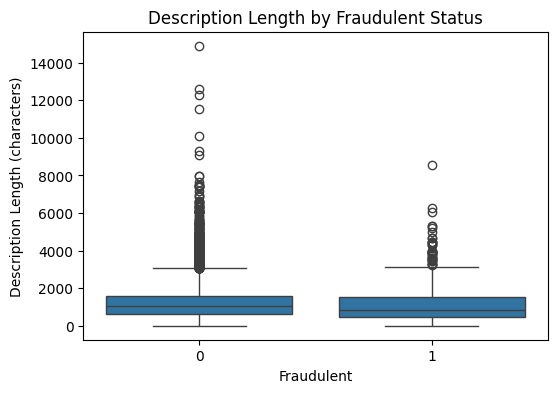

fraudulent
0    1221.219701
1    1154.834873
Name: desc_len, dtype: float64


In [9]:
#box plot
plt.figure(figsize=(6,4))
sns.boxplot(x='fraudulent', y='desc_len', data=df)
plt.title('Description Length by Fraudulent Status')
plt.ylabel('Description Length (characters)')
plt.xlabel('Fraudulent')
plt.show()

# check mean
print(df.groupby('fraudulent')['desc_len'].mean())

# Sentiment Analysis

                 pos       neg       neu  compound
fraudulent                                        
0           0.153887  0.010717  0.835392  0.849566
1           0.139435  0.013527  0.844758  0.793105


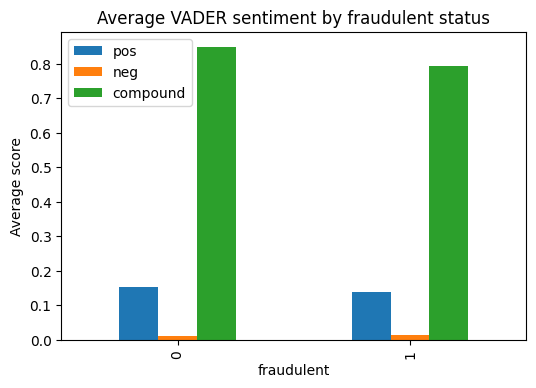

In [10]:
!pip install vaderSentiment
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
analyzer = SentimentIntensityAnalyzer()


# calculate the score
sent_df = df['description'].fillna('').apply(lambda txt: analyzer.polarity_scores(txt))
sent_df = pd.DataFrame(list(sent_df))
df = pd.concat([df, sent_df], axis=1)

# group by fraudulent 
print(df.groupby('fraudulent')[['pos','neg','neu','compound']].mean())

# bar chart
df.groupby('fraudulent')[['pos','neg','compound']].mean().plot(kind='bar', figsize=(6,4))
plt.title('Average VADER sentiment by fraudulent status')
plt.ylabel('Average score')
plt.show()

# Word frequency

In [11]:
import re
import matplotlib.pyplot as plt
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from nltk import FreqDist
import nltk

nltk.download('punkt')
nltk.download('punkt_tab')
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('omw-1.4')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\yifei\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package punkt_tab to
[nltk_data]     C:\Users\yifei\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\yifei\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\yifei\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to
[nltk_data]     C:\Users\yifei\AppData\Roaming\nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


True

Top 20 words in fraudulent descriptions: [('work', 1087), ('service', 799), ('customer', 700), ('amp', 695), ('project', 637), ('position', 610), ('product', 609), ('team', 605), ('company', 558), ('time', 548), ('experience', 501), ('system', 488), ('business', 480), ('management', 466), ('job', 462), ('skill', 451), ('looking', 434), ('support', 401), ('solution', 381), ('engineering', 372)]
Top 20 words in real descriptions: [('team', 20856), ('work', 15214), ('customer', 14883), ('service', 12675), ('company', 11637), ('product', 11558), ('client', 11494), ('business', 11477), ('experience', 10785), ('sale', 9691), ('new', 9452), ('looking', 8346), ('project', 8154), ('development', 8136), ('job', 7389), ('management', 7372), ('marketing', 6763), ('design', 6634), ('support', 6611), ('opportunity', 6599)]


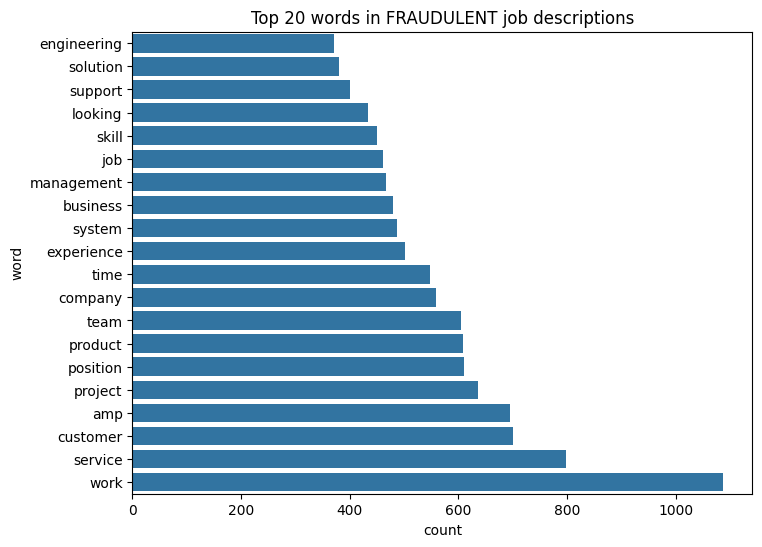

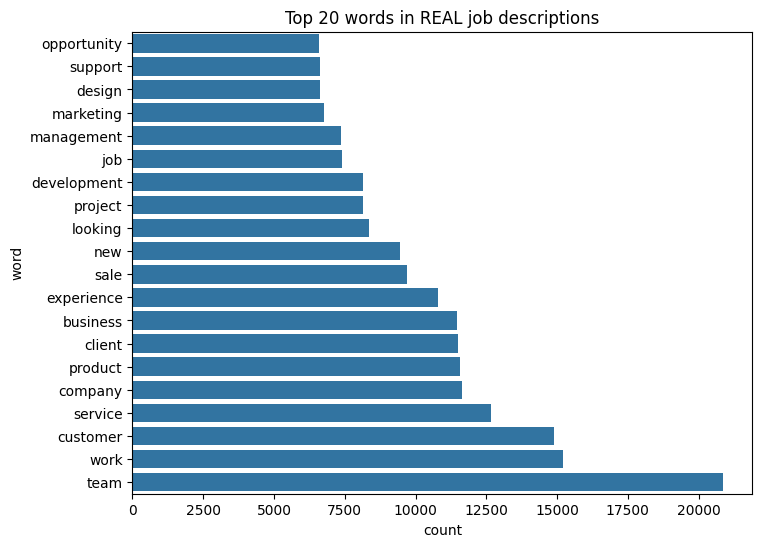

In [12]:

stops = set(stopwords.words('english'))
lemmatizer = WordNetLemmatizer()

# Preprocessing
def preprocess_text(text):
    if not isinstance(text, str):
        text = ''
    text = text.lower()                           # lower
    text = re.sub(r'[^a-z\s]', ' ', text)         # remove non-alphabetic characters
    tokens = word_tokenize(text)                  # token
    tokens = [t for t in tokens if t not in stops and len(t) > 2 and t not in {'e','b','f','c','nbsp'}]  # stop word
    lemmas = [lemmatizer.lemmatize(t) for t in tokens]             # Lemmatizing
    return lemmas

# two group
fraud_desc_series = df.loc[df['fraudulent'] == 1, 'description'].fillna('').map(preprocess_text)
real_desc_series  = df.loc[df['fraudulent'] == 0, 'description'].fillna('').map(preprocess_text)

fraud_tokens = [t for tokens in fraud_desc_series for t in tokens]
real_tokens  = [t for tokens in real_desc_series  for t in tokens]

# frequence
freq_fraud = FreqDist(fraud_tokens)
freq_real  = FreqDist(real_tokens)

# Top 20
top20_fraud = freq_fraud.most_common(20)
top20_real  = freq_real.most_common(20)

print('Top 20 words in fraudulent descriptions:', top20_fraud)
print('Top 20 words in real descriptions:', top20_real)

# bar chart
def plot_top_words(word_counts, title):
    top_df = pd.DataFrame(word_counts, columns=['word','count']).iloc[::-1]
    plt.figure(figsize=(8,6))
    sns.barplot(x='count', y='word', data=top_df)
    plt.title(title)
    plt.show()

plot_top_words(top20_fraud, 'Top 20 words in FRAUDULENT job descriptions')
plot_top_words(top20_real,  'Top 20 words in REAL job descriptions')


# Classification

Model 1

In [13]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, classification_report

# predictors & target
predictors = ['employment_type', 'required_experience', 'telecommuting', 'desc_len', 'company_profile_missing']
target = 'fraudulent'

# One-hot encoding 
X = pd.get_dummies(df[predictors], drop_first=True)
y = df[target].astype(int)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=0)

classifier = LogisticRegression(max_iter=1000)
classifier.fit(X_train, y_train) #fitting the model


y_predict = classifier.predict(X_test)

#result
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_predict))
print("\nClassification Report:")
print(classification_report(y_test, y_predict))


Confusion Matrix:
[[4273    0]
 [ 197    0]]

Classification Report:
              precision    recall  f1-score   support

           0       0.96      1.00      0.98      4273
           1       0.00      0.00      0.00       197

    accuracy                           0.96      4470
   macro avg       0.48      0.50      0.49      4470
weighted avg       0.91      0.96      0.93      4470



C:\Users\yifei\AppData\Local\Programs\Python\Python314\Lib\site-packages\sklearn\metrics\_classification.py:1731: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
C:\Users\yifei\AppData\Local\Programs\Python\Python314\Lib\site-packages\sklearn\metrics\_classification.py:1731: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
C:\Users\yifei\AppData\Local\Programs\Python\Python314\Lib\site-packages\sklearn\metrics\_classification.py:1731: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(ave

Model 2

In [14]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, classification_report

# predictors & target
predictors = ['employment_type', 'required_experience', 'telecommuting', 'desc_len', 'company_profile_missing']
target = 'fraudulent'

# One-hot encoding 
X = pd.get_dummies(df[predictors], drop_first=True)
y = df[target].astype(int)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=0)

classifier = LogisticRegression(max_iter=1000, class_weight='balanced')
classifier.fit(X_train, y_train) #fitting the model


y_predict = classifier.predict(X_test)

#result
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_predict))
print("\nClassification Report:")
print(classification_report(y_test, y_predict))

Confusion Matrix:
[[3593  680]
 [  69  128]]

Classification Report:
              precision    recall  f1-score   support

           0       0.98      0.84      0.91      4273
           1       0.16      0.65      0.25       197

    accuracy                           0.83      4470
   macro avg       0.57      0.75      0.58      4470
weighted avg       0.94      0.83      0.88      4470



C:\Users\yifei\AppData\Local\Programs\Python\Python314\Lib\site-packages\sklearn\linear_model\_logistic.py:473: ConvergenceWarning: lbfgs failed to converge after 1000 iteration(s) (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT

Increase the number of iterations to improve the convergence (max_iter=1000).
You might also want to scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [15]:
feature_names = X.columns
coefs = classifier.coef_[0]
coef_df = pd.DataFrame({'feature': feature_names, 'coef': coefs})
coef_df = coef_df.sort_values('coef', ascending=False)
print(coef_df.head(20))

                                 feature      coef
2                company_profile_missing  2.498170
10         required_experience_Executive  1.274425
8           required_experience_Director  1.144211
9        required_experience_Entry level  1.014190
5              employment_type_Part-time  0.822499
4                  employment_type_Other  0.726738
3              employment_type_Full-time  0.565773
14           required_experience_Unknown  0.559470
12  required_experience_Mid-Senior level  0.531589
0                          telecommuting  0.393304
7                employment_type_Unknown  0.377012
13    required_experience_Not Applicable  0.088462
1                               desc_len  0.000032
11        required_experience_Internship -0.335740
6              employment_type_Temporary -1.122830
